In [27]:
class GridWorld:
    def __init__(self, rows, cols, start, goal, walls={}, traps={}, max_steps=1000):
        self.rows = rows  # Number of rows in the grid
        self.cols = cols  # Number of columns in the grid
        self.start = start  # Starting position of the agent
        self.goal = goal  # Goal position that the agent should reach
        self.walls = walls  # Set of wall positions, which are non-passable
        self.traps = traps  # Set of trap positions, which give a negative reward when passed
        self.state = start  # Current position of the agent
        self.actions = ["LEFT", "UP", "RIGHT", "DOWN"]  # List of possible actions
        self.total_reward = 0  # Accumulated reward
        self.max_steps = max_steps  # Maximum number of steps per episode
        self.current_steps = 0  # Current number of steps in the episode

    def reset(self):
        """Reset the environment to its initial state and set total_reward and current_steps to 0."""
        self.state = self.start
        self.total_reward = 0
        self.current_steps = 0
        return self.state

    def is_terminal(self, state):
        """Check if the given state is terminal (i.e., the goal state)."""
        return state == self.goal

    def step(self, action):
        """
        Take a step in the environment based on the given action.

        This method updates the agent's position and returns the next state, reward, and
        whether the state is terminal. The reward structure is as follows:
        - A small penalty for each step (-0.1)
        - An additional penalty for stepping on a trap (-1)
        - A bonus for reaching the goal (1)
        """
        assert action in self.actions, "Invalid action"

        x, y = self.state

        if action == "LEFT":
            y = max(y - 1, 0)
        elif action == "UP":
            x = max(x - 1, 0)
        elif action == "RIGHT":
            y = min(y + 1, self.cols - 1)
        elif action == "DOWN":
            x = min(x + 1, self.rows - 1)

        next_state = (x, y)
        reward = -0.1  # Add a small penalty for each step

        if next_state in self.walls:
            next_state = self.state
        elif next_state in self.traps:
            reward += -1
        elif self.is_terminal(next_state):
            reward += 1
            self.reset()

        self.total_reward += reward
        self.state = next_state
        self.current_steps += 1

        # Check if the maximum number of steps is reached
        if self.current_steps >= self.max_steps:
            self.reset()

        return next_state, reward  # Return both the next state and the immediate reward

    def render(self):
        """
        Render the current state of the grid world.

        This method displays the playing field using simple characters to represent
        different elements of the grid:
        - 'S': start
        - 'G': goal
        - 'W': wall
        - 'T': trap
        - 'A': agent
        - ' ': empty space
        """
        for r in range(self.rows):
            for c in range(self.cols):
                cell = (r, c)
                if cell == self.start:
                    print("  S  ", end="")
                elif cell == self.goal:
                    print("  G  ", end="")
                elif cell in self.walls:
                    print("  W  ", end="")
                elif cell in self.traps:
                    print("  T  ", end="")
                else:
                    print("  .  ", end="")
            print()



In [28]:
import numpy as np

class SimpleAgent:
    def __init__(self, actions):
        self.actions = actions  # Initialize the agent with a list of possible actions

    def policy(self, state, goal):
        # Calculate the direction towards the goal
        direction = (np.sign(goal[0] - state[0]), np.sign(goal[1] - state[1]))

        # Choose action based on direction with 80% probability, otherwise choose a random action
        if np.random.rand() < 0.8:
            # If the agent needs to move up or down, prioritize row alignment
            if direction[0] == -1:  # If the agent needs to move up
                action = "UP"
            elif direction[0] == 1:  # If the agent needs to move down
                action = "DOWN"
            # If the agent is already in the correct row, align the column
            elif direction[1] == -1:  # If the agent needs to move left
                action = "LEFT"
            elif direction[1] == 1:  # If the agent needs to move right
                action = "RIGHT"
            # If the agent is already aligned with the goal, choose a random action - should never occur
            else:
                action = np.random.choice(self.actions)
        # With a 20% probability, choose a random action from the action space
        else:
            action = np.random.choice(self.actions)

        return action  # Return the chosen action


In [29]:
def run_episode(gridworld, agent):
    state = gridworld.reset()  # Reset the gridworld to its initial state
    episode = []  # Initialize an empty list to store the episode

    # Continue taking actions in the gridworld until the agent reaches the terminal (goal) state
    while not gridworld.is_terminal(state):
        action = agent.policy(state, gridworld.goal)  # Get the agent's action based on its policy
        next_state, reward = gridworld.step(action)  # Perform the action and get the next state

        # Append the current state, action, and total reward to the episode list
        episode.append((state, action, reward))
        
        state = next_state  # Update the state to the next state

    return episode  # Return the completed episode


In [30]:
# Example Girdworld
empty_gridworld = GridWorld(rows=4, cols=4, start=(0, 0), goal=(3, 3))
simple_gridworld = GridWorld(rows=4, cols=4, start=(0, 0), goal=(3, 3),
                              walls={(1, 1), (2, 1)},
                              traps={(1, 3), (2, 3)})

complex_gridworld = GridWorld(rows=5, cols=5, start=(0, 0), goal=(4, 4),
                               walls={(1, 1), (1, 2), (2, 1), (2, 3), (3, 3), (3, 4)},
                               traps={(3, 0), (3, 1), (4, 1), (4, 3)})

narrow_path_gridworld = GridWorld(rows=6, cols=6, start=(0, 0), goal=(5, 5),
                                   walls={(1, 0), (1, 1), (1, 2), (1, 3), (1, 4),
                                          (3, 1), (3, 2), (3, 3), (3, 4), (3, 5)},
                                   traps={(4, 0), (4, 5)})

empty_gridworld.render()
print()
simple_gridworld.render()
print()
complex_gridworld.render()
print()
narrow_path_gridworld.render()

  S    .    .    .  
  .    .    .    .  
  .    .    .    .  
  .    .    .    G  

  S    .    .    .  
  .    W    .    T  
  .    W    .    T  
  .    .    .    G  

  S    .    .    .    .  
  .    W    W    .    .  
  .    W    .    W    .  
  T    T    .    W    W  
  .    T    .    T    G  

  S    .    .    .    .    .  
  W    W    W    W    W    .  
  .    .    .    .    .    .  
  .    W    W    W    W    W  
  T    .    .    .    .    T  
  .    .    .    .    .    G  


In [31]:
from collections import defaultdict
def evaluate_gridworld(gridworld, num_episodes=1000):
    agent = SimpleAgent(gridworld.actions)
    # Initialize the value function and the count of each state
    returns_sum = defaultdict(float)
    returns_count = defaultdict(int)
    V = defaultdict(float)

    for _ in range(num_episodes):
        episode = run_episode(gridworld, agent)
        # Calculate the return for each state in the episode
        G = 0
        for t in range(len(episode) - 1, -1, -1):
            state, action, reward = episode[t]
            G += reward

            if state not in [x[0] for x in episode[:t]]:  # Check if the state appears later in the episode - enforces first-visit MC estimation
                returns_sum[state] += G
                returns_count[state] += 1
                V[state] = returns_sum[state] / returns_count[state]

    return V


In [32]:
empty_V = evaluate_gridworld(empty_gridworld)
simple_V = evaluate_gridworld(simple_gridworld)
complex_V = evaluate_gridworld(complex_gridworld)
#narrow_path_V = evaluate_gridworld(narrow_path_gridworld)

In [33]:
def render_gridworld_and_values(gridworld, V):
    for r in range(gridworld.rows):
        for c in range(gridworld.cols):
            cell = (r, c)

            if cell == gridworld.start:
                cell_repr = f"    S "
            elif cell == gridworld.goal:
                cell_repr = f"    G "
            elif cell in gridworld.walls:
                cell_repr = f"    W "
            elif cell in gridworld.traps:
                cell_repr = f"    T "
            else:
                cell_repr = "    . "

            print(cell_repr, end="")
        print()

        for c in range(gridworld.cols):
            cell = (r, c)
            if cell in V:
                value = f"{V[cell]:6.2f}"
            else:
                value = "      "
            print(value, end="")
        print()


print("Empty Gridworld")
render_gridworld_and_values(empty_gridworld, empty_V)
print("\nSimple Gridworld")
render_gridworld_and_values(simple_gridworld, simple_V)

print("\nComplex Gridworld")
render_gridworld_and_values(complex_gridworld, complex_V)

print("\nNarrow Path Gridworld")
render_gridworld_and_values(narrow_path_gridworld, narrow_path_V)


Empty Gridworld
    S     .     .     . 
  0.26  0.39  0.27      
    .     .     .     . 
  0.37  0.49  0.50  0.80
    .     .     .     . 
  0.49  0.60  0.71  0.73
    .     .     .     G 
  0.61  0.73  0.87      

Simple Gridworld
    S     .     .     . 
  0.20 -0.74  0.12 -1.35
    .     W     .     T 
  0.36        0.46 -0.00
    .     W     .     T 
  0.48        0.68  0.74
    .     .     .     G 
  0.61  0.73  0.86      

Complex Gridworld
    S     .     .     .     . 
 -5.94-43.28-76.91-100.67-71.52
    .     W     W     .     . 
 -3.78            -99.38-98.64
    .     W     .     W     . 
 -3.45       -1.33      -98.42
    T     T     .     W     W 
 -2.32 -1.99 -0.72            
    .     T     .     T     G 
 -2.05 -0.84 -0.45  0.73      

Narrow Path Gridworld
    S     .     .     .     .     . 
-69.69-67.65-63.80-57.74-49.47-39.81
    W     W     W     W     W     . 
                              -38.90
    .     .     .     .     .     . 
 -2.84-16.22-25.46-32.19-36.

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_gridworld_v_values(gridworld, V, title):
    # Create a numpy array to store the V values for each cell in the gridworld
    v_grid = np.zeros((gridworld.rows, gridworld.cols))
    for cell, value in V.items():
        v_grid[cell] = value

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()
    # Create a heatmap using the v_grid values with a coolwarm color map
    im = ax.imshow(v_grid, cmap="coolwarm", interpolation="nearest")

    # Loop through the rows and columns of the gridworld
    for i in range(gridworld.rows):
        for j in range(gridworld.cols):
            cell = (i, j)
            # Set color for different cell types: start, goal, walls, and traps
            if cell == gridworld.start:
                color = "yellow"
            elif cell == gridworld.goal:
                color = "lime"
            elif cell in gridworld.walls:
                color = "gray"
            elif cell in gridworld.traps:
                color = "red"
            else:
                color = None

            # If the cell has a color, create a rectangle patch and add it to the axis
            if color:
                rect = patches.Rectangle((j - 0.25, i - 0.25), 0.5, 0.5,
                                         linewidth=1, edgecolor=color, facecolor=color)
                ax.add_patch(rect)

            # Add the V value text to the cell
            text = ax.text(j, i, f"{v_grid[i, j]:.2f}",
                           ha="center", va="center", color="black", fontsize=8)

    # Add a colorbar to the plot, set axis ticks, and add a title
    plt.colorbar(im)
    plt.xticks(range(gridworld.cols))
    plt.yticks(range(gridworld.rows))
    plt.title(title)
    plt.show()


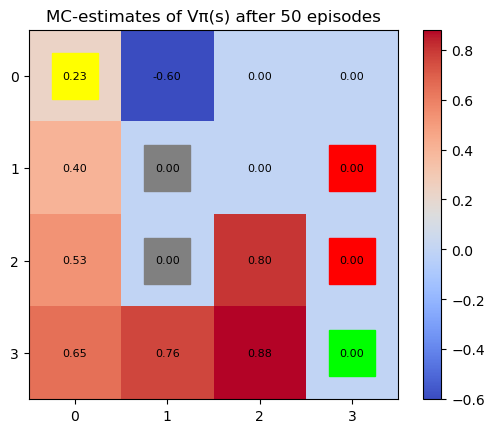

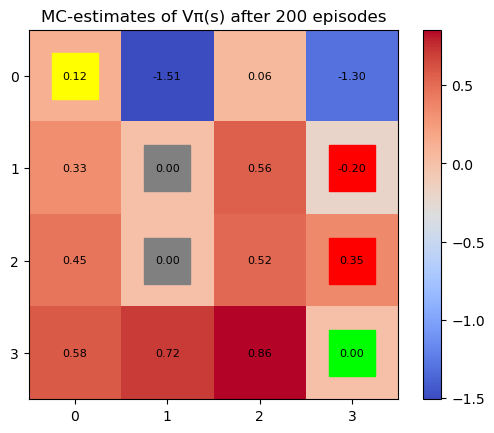

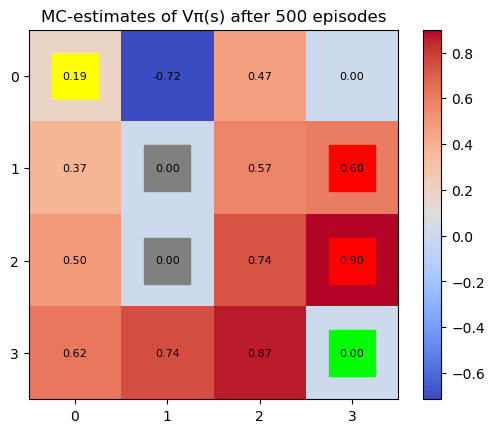

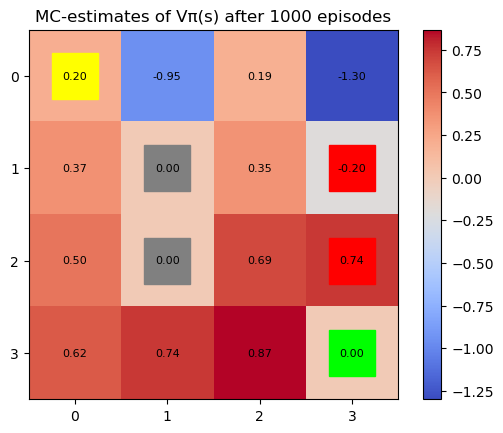

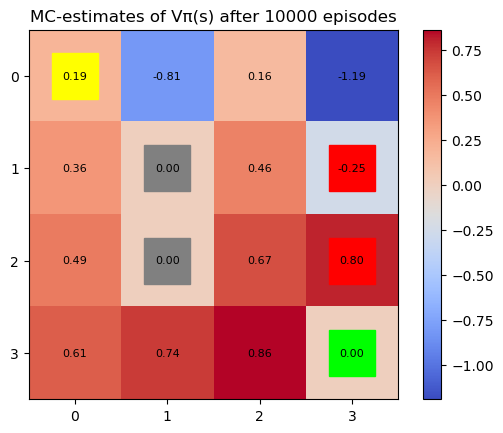

In [35]:
episode_numbers = [50, 200, 500, 1000, 10000]
gridworld = simple_gridworld  # You can change this to visualize different gridworld environments

for num_episodes in episode_numbers:
    V = evaluate_gridworld(gridworld, num_episodes)
    title = f"MC-estimates of Vπ(s) after {num_episodes} episodes"
    plot_gridworld_v_values(gridworld, V, title)